# Knn-Neighbours Classifier

In [ ]:
# Import Necessary Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
fruits=pd.read_csv("fruit_data_with_colors.csv")

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
# Mapping of fruit label value

In [9]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Split Data into train and test

In [10]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

In [12]:
X.head()

,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


In [13]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 42 to 44
Data columns (total 3 columns):
mass      44 non-null int64
width     44 non-null float64
height    44 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 26 to 33
Data columns (total 3 columns):
mass      15 non-null int64
width     15 non-null float64
height    15 non-null float64
dtypes: float64(2), int64(1)
memory usage: 480.0 bytes


In [ ]:
# Create classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)

In [21]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
# Train the classifier (Fit Estimator using training Data)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
# Estimate accuracy of classifier on future data

In [26]:
knn.score(X_test, y_test)

0.53333333333333333

In [27]:
# Use the trained k-NN classifier model to classify new, previously unseen objects

In [44]:
#  example: a small fruit with mass 100g, width 5.3 cm, height 6.5 cm
fruit_prediction= knn.predict([[100, 5.3, 6.5]])

In [45]:
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [46]:
# Plot Decision Boundaries of KNN_classifier

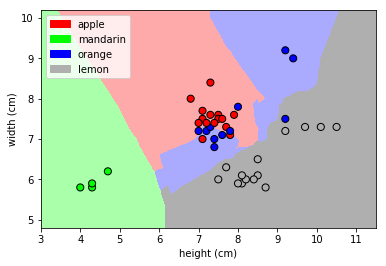

In [47]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform') 

In [48]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

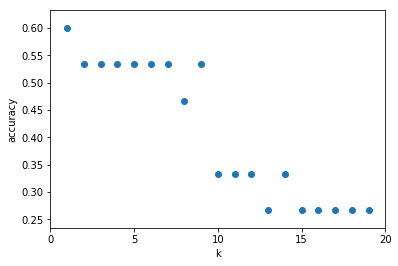

In [49]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.show()

In [50]:
# How sensitive is k-NN classification accuracy to the train/test split proportion?

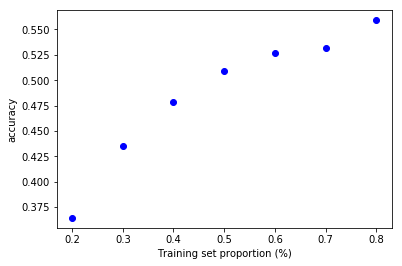

In [51]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.show()